In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle
import math
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
import time

C:\Users\huimi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pickle_in=open("DogCatX.pickle",'rb')
DogCatX=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open('DogCaty.pickle','rb')
DogCaty=pickle.load(pickle_in)
pickle_in.close()
DogCatX = np.array(DogCatX).reshape(-1, 50, 50, 1)
DogCatX.shape

(24946, 50, 50, 1)

In [3]:
DogCatX,DogCaty=shuffle(DogCatX,DogCaty,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(DogCatX,DogCaty,random_state=5,test_size=0.25)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [5]:
train_size=list(range(2,11,2))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
learn_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=0)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    model=Sequential()
    model.add(Conv2D(64,(3,3),input_shape=X_train_sub.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),input_shape=X_train_sub.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    model.fit(X_train_sub,y_train_sub,batch_size=32,epochs=10)  
    errorate_train.append(1-model.evaluate(X_train_sub,y_train_sub)[1])
    errorate_test.append(1-model.evaluate(X_test,y_test)[1])  
    learn_time.append(time.clock()-time_start)    

Epoch 1/10
3741/3741 [==============================] - 20s 5ms/step - loss: 0.6865 - acc: 0.5370
Epoch 2/10
3741/3741 [==============================] - 22s 6ms/step - loss: 0.6516 - acc: 0.6140
Epoch 3/10
3741/3741 [==============================] - 21s 6ms/step - loss: 0.6213 - acc: 0.6517
Epoch 4/10
3741/3741 [==============================] - 21s 6ms/step - loss: 0.6210 - acc: 0.6656: 4s - los
Epoch 5/10
3741/3741 [==============================] - 22s 6ms/step - loss: 0.5832 - acc: 0.6950
Epoch 6/10
3741/3741 [==============================] - 22s 6ms/step - loss: 0.5547 - acc: 0.7148
Epoch 7/10
3741/3741 [==============================] - 22s 6ms/step - loss: 0.5183 - acc: 0.7506
Epoch 8/10
3741/3741 [==============================] - 21s 6ms/step - loss: 0.4999 - acc: 0.7594
Epoch 9/10
3741/3741 [==============================] - 23s 6ms/step - loss: 0.4545 - acc: 0.7872
Epoch 10/10
6237/6237 [==============================] - 11s 2ms/step
Epoch 1/10
7483/7483 [================

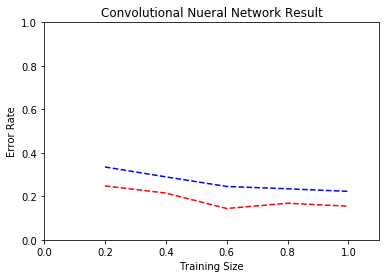

In [6]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('Convolutional Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_CNN_Error.png')

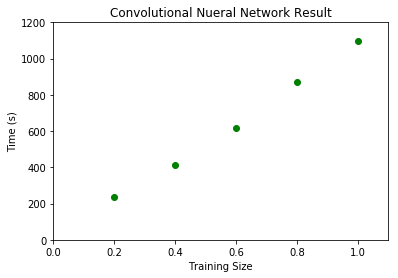

In [8]:
plt.plot(train_size,learn_time,'go')
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.axis([0,1.1,0,1200])
plt.title('Convolutional Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_CNN_T.png')

In [9]:
errorate_test

[0.3349366681935486,
 0.2894019561833022,
 0.24531024527201883,
 0.23456790128235105,
 0.2227032226649962]

In [10]:
    model=Sequential()
    model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    history=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data = (X_test, y_test))  

Train on 18709 samples, validate on 6237 samples
Epoch 1/10
18709/18709 [==============================] - 117s 6ms/step - loss: 0.6403 - acc: 0.6306 - val_loss: 0.5862 - val_acc: 0.7026
Epoch 2/10
18709/18709 [==============================] - 111s 6ms/step - loss: 0.5570 - acc: 0.7226 - val_loss: 0.5198 - val_acc: 0.7489
Epoch 3/10
18709/18709 [==============================] - 108s 6ms/step - loss: 0.5083 - acc: 0.7549 - val_loss: 0.5301 - val_acc: 0.7420
Epoch 4/10
18709/18709 [==============================] - 107s 6ms/step - loss: 0.4826 - acc: 0.7732 - val_loss: 0.5133 - val_acc: 0.7480
Epoch 5/10
18709/18709 [==============================] - 107s 6ms/step - loss: 0.4705 - acc: 0.7782 - val_loss: 0.5518 - val_acc: 0.7350
Epoch 6/10
18709/18709 [==============================] - 107s 6ms/step - loss: 0.4494 - acc: 0.7899 - val_loss: 0.5221 - val_acc: 0.7438: 0s - loss: 0.4494 - acc: 0.789
Epoch 7/10
18709/18709 [==============================] - 107s 6ms/step - loss: 0.4351 - ac

In [11]:
epoch=list(range(1,11))
acc=[1-x for x in history.history['acc']]
test_acc=[1-x for x in history.history['val_acc']]

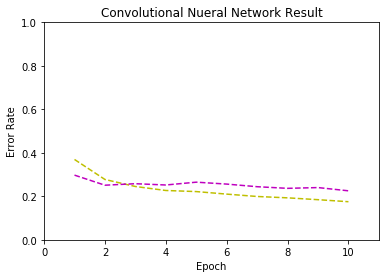

In [12]:
plt.plot(epoch,acc,'y--',epoch,test_acc,'m--')
plt.axis([0,11,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Epoch')
plt.title('Convolutional Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_CNN_Epoch_Error.png')